In [1]:
import pandas as pd
import numpy as np
import skbio
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import researchpy as rp
from matplotlib import rcParams
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from statsmodels.stats.multicomp import MultiComparison
#dunns
from itertools import combinations
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.libqsturng import psturng
import warnings

rcParams.update({'figure.autolayout': True})

In [2]:
date = '26.11.19'

In [3]:
luminescence_means = f'../../../../data/luminescence/to_be_sorted/{date}/output_means.csv'
luminescence_raw = f'../../../../data/luminescence/to_be_sorted/{date}/output_raw.csv'

In [4]:
luminescence_means_df = pd.read_csv(luminescence_means, header=0)
luminescence_raw_df = pd.read_csv(luminescence_raw, header=0)

In [5]:
luminescence_means_df

,name,condition,mean_luminescence,standard_error,date
0,25+72,N-free K3G1,1.151724,0.315713,26.11.19
1,25+72,"W5 then 10 mM KNO3, 2 hours morning",2.808982,1.128901,26.11.19
2,25+72,"W5 then 10 mM Kcl, 2 hours morning",2.328943,0.416367,26.11.19
3,25+72,"W5, 10 mM KNO3_overnight",3.055662,0.405042,26.11.19
4,25+72,replete K3G1,1.091513,0.278987,26.11.19
5,35+72,N-free K3G1,73.431986,5.359028,26.11.19
6,35+72,"W5 then 10 mM KNO3, 2 hours morning",75.081302,9.374357,26.11.19
7,35+72,"W5 then 10 mM Kcl, 2 hours morning",104.291185,26.827104,26.11.19
8,35+72,"W5, 10 mM KNO3_overnight",64.921355,31.885983,26.11.19
9,35+72,replete K3G1,57.306098,8.298701,26.11.19


In [6]:
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date
0,A,1,Sample X1,194107.0,42776456.0,71 + 72,"W5 then 10 mM Kcl, 2 hours morning",220.375648,26.11.19
1,A,2,Sample X7,179901.0,19594833.0,71 + 72,"W5 then 10 mM Kcl, 2 hours morning",108.920089,26.11.19
2,A,3,Sample X13,98180.0,20401916.0,71 + 72,"W5 then 10 mM Kcl, 2 hours morning",207.801141,26.11.19
3,A,4,Sample X19,641555.0,70528823.0,71 + 72,"W5 then 10 mM KNO3, 2 hours morning",109.934180,26.11.19
4,A,5,Sample X24,184769.0,29024550.0,71 + 72,"W5 then 10 mM KNO3, 2 hours morning",157.085604,26.11.19
...,...,...,...,...,...,...,...,...,...
75,H,8,Sample X73,26332.0,1800670.0,35+72,replete K3G1,68.383336,26.11.19
76,H,9,Sample X75,13043.0,814816.0,35+72,replete K3G1,62.471517,26.11.19
77,H,10,Sample X77,34232.0,53161.0,25+72,replete K3G1,1.552962,26.11.19
78,H,11,Sample X79,4447.0,5036.0,25+72,replete K3G1,1.132449,26.11.19


In [7]:
#remove column 12

In [8]:
#add promoter names column
luminescence_raw_df['Promoter'] = luminescence_raw_df.name 

In [9]:
luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 72', 'Promoter'] = 'UBQ10'
luminescence_raw_df.loc[luminescence_raw_df.name == '71+72', 'Promoter'] = 'UBQ10'
luminescence_raw_df.loc[luminescence_raw_df.name == '25+72', 'Promoter'] = 'NIR1'
luminescence_raw_df.loc[luminescence_raw_df.name == '35+72', 'Promoter'] = 'NOS'
luminescence_raw_df.loc[luminescence_raw_df.name == '36+72', 'Promoter'] = 'STAP4'
luminescence_raw_df.loc[luminescence_raw_df.name == '92+72', 'Promoter'] = 'NRP'
luminescence_raw_df.loc[luminescence_raw_df.name == '92+29+72', 'Promoter'] = 'NRP+NLP7_TF'

In [10]:
#select UBQ10 promoter means
UBQ10_means_old = luminescence_means_df[(luminescence_means_df.name == '71 + 72') | (luminescence_means_df.name == '71+72')].copy()
UBQ10_means_old

,name,condition,mean_luminescence,standard_error,date
14,71 + 72,"W5 then 10 mM KNO3, 2 hours morning",165.309175,34.589967,26.11.19
15,71 + 72,"W5 then 10 mM Kcl, 2 hours morning",179.032293,35.243535,26.11.19
16,71 + 72,"W5, 10 mM KNO3_overnight",118.309783,10.958352,26.11.19
17,71+72,N-free K3G1,107.168545,33.445537,26.11.19
18,71+72,replete K3G1,127.120250,15.427830,26.11.19


In [11]:
#Create correction factor of 179.03/meanluminescence of differing condition for each condition
UBQ10_means_old['correction_factor'] = UBQ10_means_old.iloc[1][2] / UBQ10_means_old['mean_luminescence']

In [12]:
UBQ10_means_old.iloc[1][2]

179.03229287563258

In [13]:
UBQ10_means_old

,name,condition,mean_luminescence,standard_error,date,correction_factor
14,71 + 72,"W5 then 10 mM KNO3, 2 hours morning",165.309175,34.589967,26.11.19,1.083015
15,71 + 72,"W5 then 10 mM Kcl, 2 hours morning",179.032293,35.243535,26.11.19,1.000000
16,71 + 72,"W5, 10 mM KNO3_overnight",118.309783,10.958352,26.11.19,1.513250
17,71+72,N-free K3G1,107.168545,33.445537,26.11.19,1.670568
18,71+72,replete K3G1,127.120250,15.427830,26.11.19,1.408370


In [14]:
#select UBQ10:fluc condition means
luminescence_raw_df_means = luminescence_raw_df[['condition', 'fluc_luminescence']].groupby('condition').mean().reset_index()
luminescence_raw_df_means

,condition,fluc_luminescence
0,N-free K3G1,146609.933333
1,"W5 then 10 mM KNO3, 2 hours morning",88288.904762
2,"W5 then 10 mM Kcl, 2 hours morning",62408.117647
3,"W5, 10 mM KNO3_overnight",150213.333333
4,replete K3G1,72379.916667


In [15]:
#Create correction factor of W5, KCl mean/fluc_luminescence of differing condition for each condition
luminescence_raw_df_means['correction_factor'] = luminescence_raw_df_means.iloc[2][1] / luminescence_raw_df_means['fluc_luminescence']

In [16]:
luminescence_raw_df_means.iloc[2][1]

62408.117647058825

In [17]:
luminescence_raw_df_means

,condition,fluc_luminescence,correction_factor
0,N-free K3G1,146609.933333,0.425675
1,"W5 then 10 mM KNO3, 2 hours morning",88288.904762,0.706863
2,"W5 then 10 mM Kcl, 2 hours morning",62408.117647,1.000000
3,"W5, 10 mM KNO3_overnight",150213.333333,0.415463
4,replete K3G1,72379.916667,0.862230


In [18]:
#create new corrected UBQ10:fluc column
#first merge dfs, only adding the correction factor column
luminescence_raw_corrected_fluc = pd.merge(luminescence_raw_df, luminescence_raw_df_means[['condition', 'correction_factor']], on='condition')
#then create corrected_fluc column, fluc multiplied by correction factor
luminescence_raw_corrected_fluc['corrected_fluc'] = luminescence_raw_corrected_fluc['fluc_luminescence'] * luminescence_raw_corrected_fluc['correction_factor']
#correct nluc/fluc:
luminescence_raw_corrected_fluc['corrected_nluc/fluc'] = luminescence_raw_corrected_fluc['nluc_luminescence']/luminescence_raw_corrected_fluc['corrected_fluc']

In [19]:
luminescence_raw_df.condition.unique()

array(['W5 then 10 mM Kcl, 2 hours morning',
       'W5 then 10 mM KNO3, 2 hours morning', 'W5, 10 mM KNO3_overnight',
       'N-free K3G1', 'replete K3G1'], dtype=object)

In [20]:
luminescence_raw_df[luminescence_raw_df.Promoter == 'NRP+NLP7_TF']

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date,Promoter
60,F,1,Sample X6,40929.0,382303.0,92+29+72,"W5 then 10 mM Kcl, 2 hours morning",9.340639,26.11.19,NRP+NLP7_TF
61,F,3,Sample X18,2013.0,17982.0,92+29+72,"W5 then 10 mM Kcl, 2 hours morning",8.932936,26.11.19,NRP+NLP7_TF


In [21]:
#set style to ticks
sns.set(style="ticks", color_codes=True)

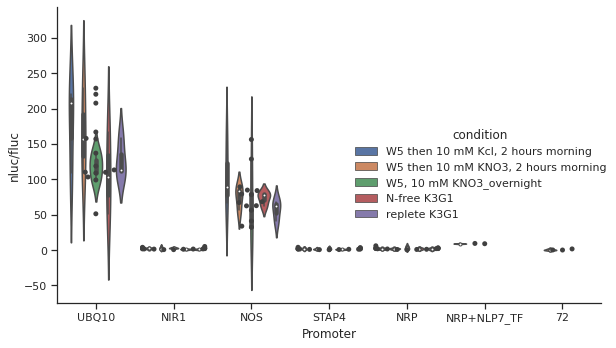

In [22]:
plot = sns.catplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, hue='condition', kind='violin')
#plot points
ax = sns.swarmplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, color=".25").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/luminescence_violin.pdf', format='pdf')

In [23]:
#remove promoter 72
luminescence_raw_df_no_72 = luminescence_raw_corrected_fluc.copy()
luminescence_raw_df_no_72.Promoter = luminescence_raw_df_no_72.Promoter.mask(luminescence_raw_df_no_72.Promoter == '72')

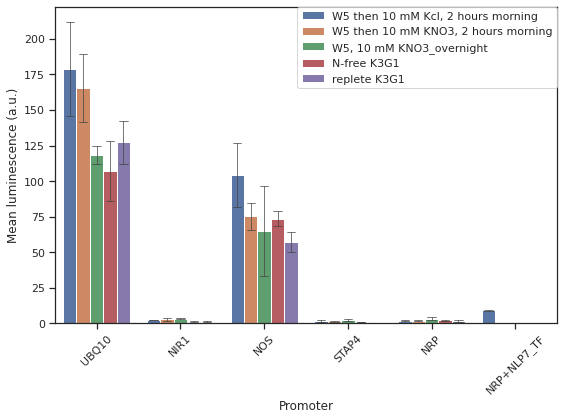

In [25]:
#set figure size
sns.set(rc={'figure.figsize':(8,6)}, style="ticks", color_codes=True)
#bar chart, 68% confidence intervals (1 Standard error)
plot = sns.barplot(x="Promoter", y="nluc/fluc", hue="condition", data=luminescence_raw_df_no_72, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.legend(loc='upper right', borderaxespad=0.)
plt.ylabel("Mean luminescence (a.u.)").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence.pdf', format='pdf')

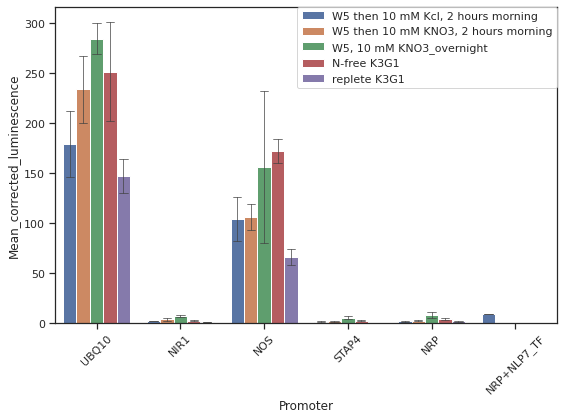

In [57]:
#set figure size
sns.set(rc={'figure.figsize':(8,6)}, style="ticks", color_codes=True)

#UBQ10 reacts to each conditions, so use applied correction factor
#bar chart, 68% confidence intervals (1 Standard error)
plot = sns.barplot(x="Promoter", y="corrected_nluc/fluc", hue="condition", data=luminescence_raw_df_no_72, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.legend(loc='upper right', borderaxespad=0.)
plt.ylabel("Mean_corrected_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence_corrected.pdf', format='pdf')

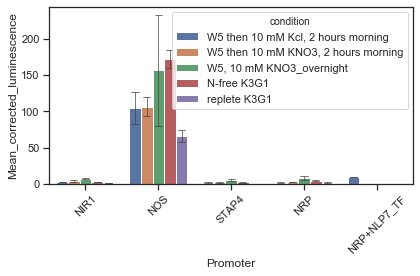

In [214]:
#remove UBQ10 from this
luminescence_raw_df_no_UBQ10 = luminescence_raw_df_no_72.copy()
luminescence_raw_df_no_UBQ10.Promoter = luminescence_raw_df_no_UBQ10.Promoter.mask(luminescence_raw_df_no_UBQ10.Promoter == 'UBQ10')
#plot again
plot = sns.barplot(x="Promoter", y="corrected_nluc/fluc", hue="condition", data=luminescence_raw_df_no_UBQ10, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.ylabel("Mean_corrected_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence_corrected_no_UBQ10.pdf', format='pdf')

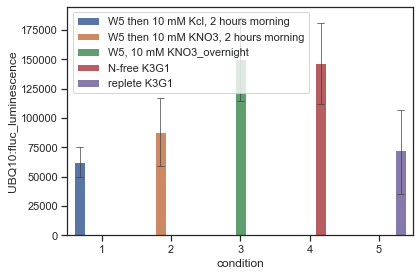

In [215]:
#plot raw UBQ10
plot = sns.barplot(x='condition', hue="condition", y="fluc_luminescence", data=luminescence_raw_df,ci=68,capsize=0.1,errwidth=0.7,n_boot=10000)
#plt.tight_layout(pad=1.0)
#plot.set_xticklabels(plot.get_xticklabels(), rotation=70)
plot.set_xticklabels('12345')
plt.legend(loc='upper left')
plt.ylabel("UBQ10:fluc_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/UBQ10fluc_raw.pdf', format='pdf')


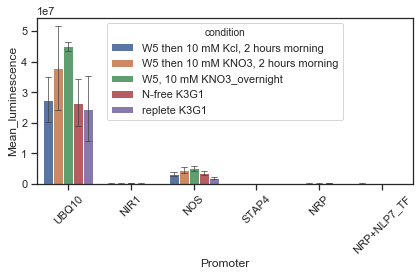

In [217]:
#plot graph with mean nluc on its own
plot = sns.barplot(x="Promoter", y="nluc_luminescence", hue="condition", data=luminescence_raw_df_no_72, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.ylabel("Mean_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence_nluc_mean.pdf', format='pdf')

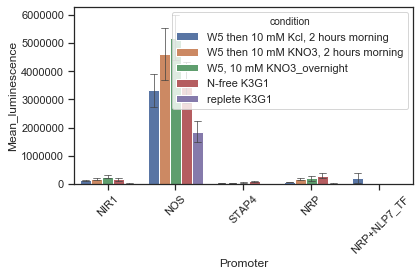

In [218]:
#plot graph with mean nluc on its own - no UBQ10
plot = sns.barplot(x="Promoter", y="nluc_luminescence", hue="condition", data=luminescence_raw_df_no_UBQ10, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.ylabel("Mean_luminescence").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence_nluc_mean_no_UBQ10.pdf', format='pdf')

### get names of each condition for later

In [60]:
pd.Categorical(luminescence_raw_df_no_72.condition)
names = luminescence_raw_df_no_72.condition.unique()
for name in names:
    print(name)

W5 then 10 mM Kcl, 2 hours morning
W5 then 10 mM KNO3, 2 hours morning
W5, 10 mM KNO3_overnight
N-free K3G1
replete K3G1


In [61]:
#get list of promoters
pd.Categorical(luminescence_raw_df_no_72.Promoter)
prom_names = luminescence_raw_df_no_72.Promoter.unique()
for name in prom_names:
    print(name)

UBQ10
NIR1
NOS
STAP4
NRP
NRP+NLP7_TF
nan


### test normality

In [75]:
#returns test statistic, p-value
for name1 in prom_names:
    for name in names:
        print('{}: {}'.format(name, stats.shapiro(luminescence_raw_df_no_72['corrected_nluc/fluc'][luminescence_raw_df_no_72.condition == name])))


W5 then 10 mM Kcl, 2 hours morning: (0.7076970338821411, 0.0001414914586348459)
W5 then 10 mM KNO3, 2 hours morning: (0.6323460340499878, 4.411865120346192e-06)
W5, 10 mM KNO3_overnight: (0.7006860971450806, 0.0002527477336116135)
N-free K3G1: (0.7482393980026245, 0.0008573827217333019)
replete K3G1: (0.8192567229270935, 0.01564178615808487)
W5 then 10 mM Kcl, 2 hours morning: (0.7076970338821411, 0.0001414914586348459)
W5 then 10 mM KNO3, 2 hours morning: (0.6323460340499878, 4.411865120346192e-06)
W5, 10 mM KNO3_overnight: (0.7006860971450806, 0.0002527477336116135)
N-free K3G1: (0.7482393980026245, 0.0008573827217333019)
replete K3G1: (0.8192567229270935, 0.01564178615808487)
W5 then 10 mM Kcl, 2 hours morning: (0.7076970338821411, 0.0001414914586348459)
W5 then 10 mM KNO3, 2 hours morning: (0.6323460340499878, 4.411865120346192e-06)
W5, 10 mM KNO3_overnight: (0.7006860971450806, 0.0002527477336116135)
N-free K3G1: (0.7482393980026245, 0.0008573827217333019)
replete K3G1: (0.8192567

#### not normal

In [98]:
#test variance
stats.levene(luminescence_raw_df_no_72['corrected_nluc/fluc'][luminescence_raw_df_no_72.condition == names[0]], 
               luminescence_raw_df_no_72['corrected_nluc/fluc'][luminescence_raw_df_no_72.condition == names[1]], 
               luminescence_raw_df_no_72['corrected_nluc/fluc'][luminescence_raw_df_no_72.condition == names[2]],
            luminescence_raw_df_no_72['corrected_nluc/fluc'][luminescence_raw_df_no_72.condition == names[3]],
            luminescence_raw_df_no_72['corrected_nluc/fluc'][luminescence_raw_df_no_72.condition == names[4]])

LeveneResult(statistic=0.6345376968467111, pvalue=0.639429384987563)

In [64]:
test = luminescence_raw_df_no_72.groupby('Promoter')

In [65]:
test

# Kruskal-Wallis one way analysis of variance: scipy.stats.kruskal

In [99]:
#luminescence kurskal wallis
for promoter, value in test:
    print(promoter)
    print(stats.kruskal(value['nluc/fluc'][value.condition == names[0]], 
               value['nluc/fluc'][value.condition == names[1]],
                value['nluc/fluc'][value.condition == names[2]],
                      value['nluc/fluc'][value.condition == names[3]],
                       value['nluc/fluc'][value.condition == names[4]]))

NIR1
KruskalResult(statistic=9.266666666666666, pvalue=0.05476894186007044)
NOS
KruskalResult(statistic=4.066666666666663, pvalue=0.3970586768928915)
NRP
KruskalResult(statistic=0.8333333333333428, pvalue=0.933924226117294)
NRP+NLP7_TF
KruskalResult(statistic=nan, pvalue=nan)
STAP4
KruskalResult(statistic=nan, pvalue=nan)
UBQ10
KruskalResult(statistic=2.9000000000000057, pvalue=0.5746972058298034)


In [100]:
#corrected luminescence kurskal wallis
for promoter, value in test:
    print(promoter)
    print(stats.kruskal(value['corrected_nluc/fluc'][value.condition == names[0]], 
               value['corrected_nluc/fluc'][value.condition == names[1]],
                        value['corrected_nluc/fluc'][value.condition == names[2]],
                       value['corrected_nluc/fluc'][value.condition == names[3]],
                       value['corrected_nluc/fluc'][value.condition == names[4]]))

NIR1
KruskalResult(statistic=8.566666666666663, pvalue=0.07289201922017796)
NOS
KruskalResult(statistic=7.166666666666664, pvalue=0.12733844728973628)
NRP
KruskalResult(statistic=7.233333333333327, pvalue=0.12405953313031426)
NRP+NLP7_TF
KruskalResult(statistic=nan, pvalue=nan)
STAP4
KruskalResult(statistic=nan, pvalue=nan)
UBQ10
KruskalResult(statistic=5.8999999999999915, pvalue=0.20674183849630864)


In [95]:
# #Mann-whitney individual comparisons. Correct using tukey. NO USE DUNN's test! "You should use Dunn's test∗. If one proceeds by moving from a rejection of Kruskal-Wallis to performing ordinary pair-wise rank sum tests (with or without multiple comparison adjustments), one runs into two problems: (1) the ranks that the pair-wise rank sum tests use are not the ranks used by the Kruskal-Wallis test; and (2) Dunn's test preserves a pooled variance for the tests implied by the Kruskal-Wallis null hypothesis."
# #https://stats.stackexchange.com/questions/25815/post-hoc-tests-after-kruskal-wallis-dunns-test-or-bonferroni-corrected-mann-wh
# for promoter, value in test:
#     print(promoter)
#     print(stats.mannwhitneyu(value['corrected_nluc/fluc'][value.condition == names[0]], 
#                value['corrected_nluc/fluc'][value.condition == names[1]], value['nluc/fluc'][value.condition == names[2]]))

NIR1
MannwhitneyuResult(statistic=3.0, pvalue=array([0.42719584, 0.45576797, 0.48565022]))
NOS
MannwhitneyuResult(statistic=4.0, pvalue=array([4.47362438e-012, 4.02638969e-013, 3.68542641e-171]))
NRP
MannwhitneyuResult(statistic=2.0, pvalue=array([0.41527309, 0.27558189, 0.22230118]))
NRP+NLP7_TF
MannwhitneyuResult(statistic=0.0, pvalue=array([], dtype=float64))
STAP4
MannwhitneyuResult(statistic=8.0, pvalue=array([0.40420697, 0.49457425, 0.45637365]))
UBQ10
MannwhitneyuResult(statistic=2.0, pvalue=array([7.08152229e-183, 2.04323366e-136, 5.49852293e-094]))


In [78]:
#code from here: https://gist.github.com/alimuldal/fbb19b73fa25423f02e8
def kw_dunn(groups, to_compare=None, alpha=0.05, method='bonf'):
    """
    Kruskal-Wallis 1-way ANOVA with Dunn's multiple comparison test
    Arguments:
    ---------------
    groups: sequence
        arrays corresponding to k mutually independent samples from
        continuous populations
    to_compare: sequence
        tuples specifying the indices of pairs of groups to compare, e.g.
        [(0, 1), (0, 2)] would compare group 0 with 1 & 2. by default, all
        possible pairwise comparisons between groups are performed.
    alpha: float
        family-wise error rate used for correcting for multiple comparisons
        (see statsmodels.stats.multitest.multipletests for details)
    method: string
        method used to adjust p-values to account for multiple corrections (see
        statsmodels.stats.multitest.multipletests for options)
    Returns:
    ---------------
    H: float
        Kruskal-Wallis H-statistic
    p_omnibus: float
        p-value corresponding to the global null hypothesis that the medians of
        the groups are all equal
    Z_pairs: float array
        Z-scores computed for the absolute difference in mean ranks for each
        pairwise comparison
    p_corrected: float array
        corrected p-values for each pairwise comparison, corresponding to the
        null hypothesis that the pair of groups has equal medians. note that
        these are only meaningful if the global null hypothesis is rejected.
    reject: bool array
        True for pairs where the null hypothesis can be rejected for the given
        alpha
    Reference:
    ---------------
    Gibbons, J. D., & Chakraborti, S. (2011). Nonparametric Statistical
    Inference (5th ed., pp. 353-357). Boca Raton, FL: Chapman & Hall.
    """

    # omnibus test (K-W ANOVA)
    # -------------------------------------------------------------------------

    groups = [np.array(gg) for gg in groups]

    k = len(groups)

    n = np.array([len(gg) for gg in groups])
    if np.any(n < 5):
        warnings.warn("Sample sizes < 5 are not recommended (K-W test assumes "
                      "a chi square distribution)")

    allgroups = np.concatenate(groups)
    N = len(allgroups)
    ranked = stats.rankdata(allgroups)

    # correction factor for ties
    T = stats.tiecorrect(ranked)
    if T == 0:
        raise ValueError('All numbers are identical in kruskal')

    # sum of ranks for each group
    j = np.insert(np.cumsum(n), 0, 0)
    R = np.empty(k, dtype=np.float)
    for ii in range(k):
        R[ii] = ranked[j[ii]:j[ii + 1]].sum()

    # the Kruskal-Wallis H-statistic
    H = (12. / (N * (N + 1.))) * ((R ** 2.) / n).sum() - 3 * (N + 1)

    # apply correction factor for ties
    H /= T

    df_omnibus = k - 1
    p_omnibus = stats.chisqprob(H, df_omnibus)

    # multiple comparisons
    # -------------------------------------------------------------------------

    # by default we compare every possible pair of groups
    if to_compare is None:
        to_compare = tuple(combinations(range(k), 2))

    ncomp = len(to_compare)

    Z_pairs = np.empty(ncomp, dtype=np.float)
    p_uncorrected = np.empty(ncomp, dtype=np.float)
    Rmean = R / n

    for pp, (ii, jj) in enumerate(to_compare):

        # standardized score
        Zij = (np.abs(Rmean[ii] - Rmean[jj]) /
               np.sqrt((1. / 12.) * N * (N + 1) * (1. / n[ii] + 1. / n[jj])))
        Z_pairs[pp] = Zij

    # corresponding p-values obtained from upper quantiles of the standard
    # normal distribution
    p_uncorrected = stats.norm.sf(Z_pairs) * 2.

    # correction for multiple comparisons
    reject, p_corrected, alphac_sidak, alphac_bonf = multipletests(
        p_uncorrected, method=method
    )

    return H, p_omnibus, Z_pairs, p_corrected, reject

In [81]:
# for promoter, value in test:
#     print(promoter)
#      print(stats.mannwhitneyu(value['corrected_nluc/fluc'][value.condition == names[0]], 
#                value['corrected_nluc/fluc'][value.condition == names[1]], value['nluc/fluc'][value.condition == names[1]]))

NIR1
MannwhitneyuResult(statistic=3.0, pvalue=array([0.3639267 , 0.32791625, 0.41186797]))
NOS
MannwhitneyuResult(statistic=4.0, pvalue=array([7.11254383e-34, 5.15539552e-75, 8.58068180e-74]))
NRP
MannwhitneyuResult(statistic=2.0, pvalue=array([0.25676994, 0.18066868, 0.30369987]))
NRP+NLP7_TF
MannwhitneyuResult(statistic=0.0, pvalue=array([], dtype=float64))
STAP4
MannwhitneyuResult(statistic=8.0, pvalue=array([0.477289  , 0.47509307, 0.44458021, 0.44410133, 0.42014179,
       0.48198999]))
UBQ10
MannwhitneyuResult(statistic=2.0, pvalue=array([2.40357620e-116, 8.07313557e-242, 0.00000000e+000]))


In [101]:
#fix error with chisqprob as in https://github.com/statsmodels/statsmodels/issues/3931
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
#run kruskal wallis with multiple bonferonni corrections
for promoter, value in test:
    if promoter !='NRP+NLP7_TF':
        print(promoter)
        print(kw_dunn([value['corrected_nluc/fluc'][value.condition == names[0]].to_list(),
               value['corrected_nluc/fluc'][value.condition == names[1]].to_list(),
               value['corrected_nluc/fluc'][value.condition == names[2]].to_list(),
                       value['corrected_nluc/fluc'][value.condition == names[3]].to_list(),
                       value['corrected_nluc/fluc'][value.condition == names[4]].to_list()]))

NIR1
(8.566666666666663, 0.07289201922017796, array([0.73029674, 1.82574186, 0.27386128, 1.00415802, 1.09544512,
       0.45643546, 1.73445477, 1.55188058, 2.82989988, 1.2780193 ]), array([1.        , 0.67889155, 1.        , 1.        , 1.        ,
       1.        , 0.82837425, 1.        , 0.04656257, 1.        ]), array([False, False, False, False, False, False, False, False,  True,
       False]))
NOS
(7.166666666666664, 0.12733844728973628, array([0.27386128, 0.36514837, 1.46059349, 1.18673221, 0.09128709,
       1.18673221, 1.46059349, 1.09544512, 1.55188058, 2.64732569]), array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.08113117]), array([False, False, False, False, False, False, False, False, False,
       False]))
NRP
(7.233333333333327, 0.12405953313031426, array([0.82158384, 2.28217732, 1.64316767, 0.27386128, 1.46059349,
       0.82158384, 0.54772256, 0.63900965, 2.00831604, 1.36930639]), array([1.   

/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Sample sizes < 5 are not recommended (K-W test assumes a chi square distribution)
/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide
/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in true_divide
/home/witham/opt/anaconda3/envs/PromoterArchitecturePipeline/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in true_divide
